In [1]:
import pandas as pd
import numpy as np
import altair as alt
from datetime import datetime, timedelta
import loymax as lm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Загрузка данных
actions = pd.read_csv('Actions.csv')
goods = pd.read_csv('Goods.csv') 
person = pd.read_csv('Person.csv')
purchases = pd.read_parquet('List_Purchases.parquet')
cheques = pd.read_parquet('List_Cheques.parquet')

In [5]:
print("Ищем скрытые кампании...")
campaign_days, daily_stats = lm.find_hidden_campaigns(purchases)
print(f"Найдено {len(campaign_days)} дней с аномальными начислениями")

Ищем скрытые кампании...
Найдено 6 дней с аномальными начислениями


## Изменения поведения

In [4]:
analysis_results = lm.analyze_purchase_changes(purchases, goods, campaign_days)
print(analysis_results.groupby('period')[['avg_cheque', 'avg_basket_size']].mean())

        avg_cheque  avg_basket_size
period                             
after   737.222870         6.870615
before  855.758592         7.146964
during  954.111817         7.445576


## Ищем изменения в категориях

In [7]:
category_changes = lm.analyze_category_shifts(purchases, goods, campaign_days)
print("Топ изменений категорий:")
print(category_changes.nlargest(5, 'change_percent')[['category', 'change_percent']])

Топ изменений категорий:
   category  change_percent
5        18        4.208067
0        18        4.111803
6         1        3.507536
7        16        2.627200
1         1        2.622754


## Визуализация

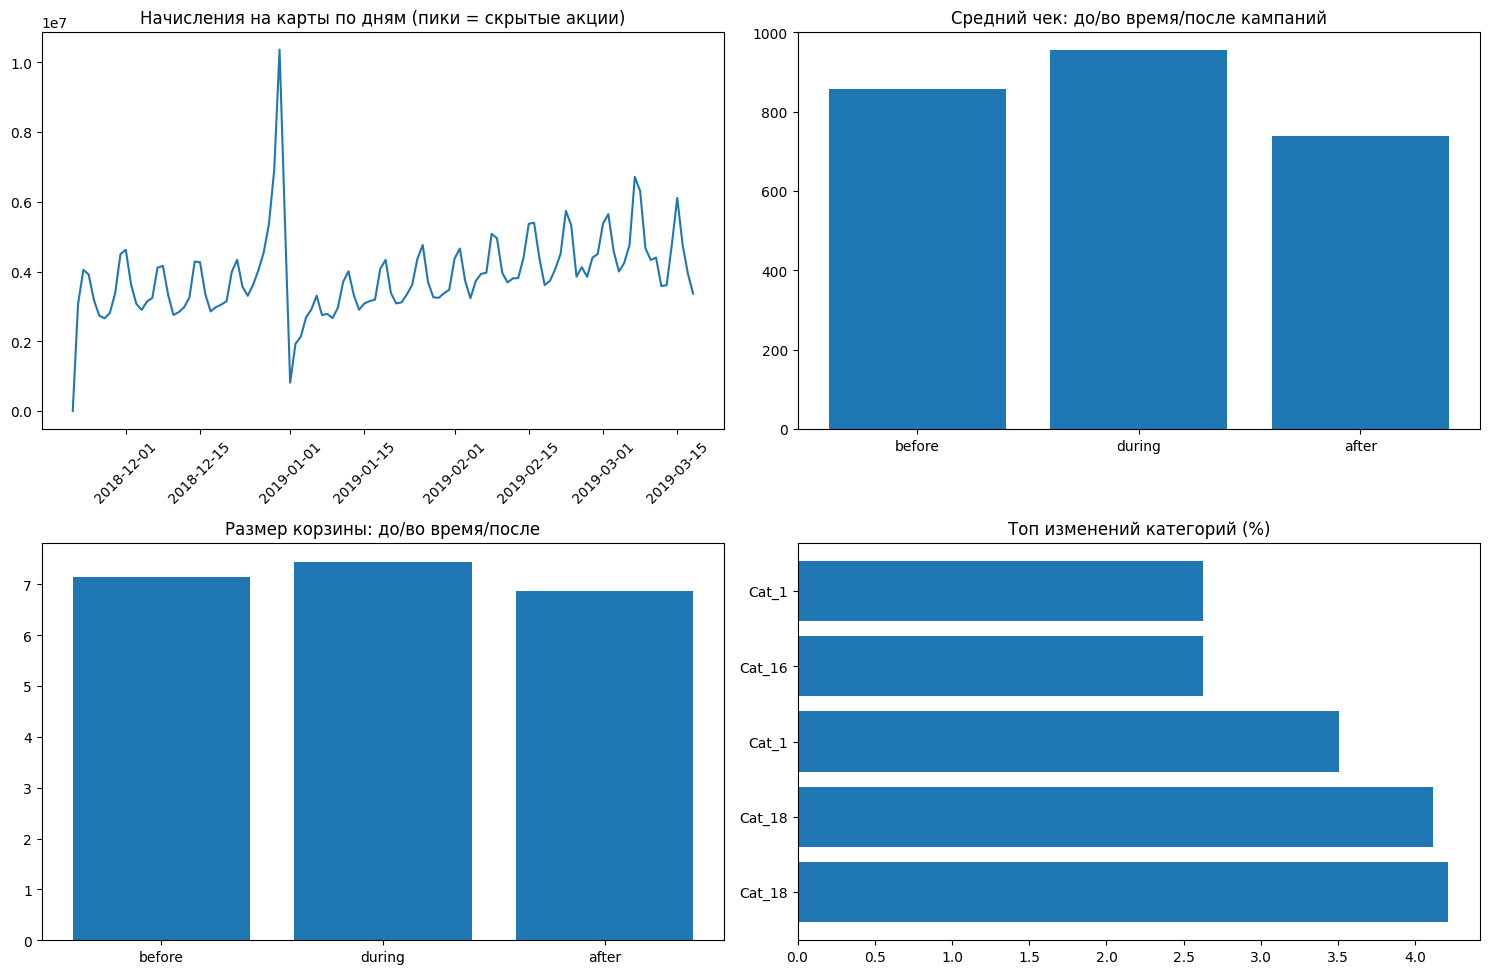

In [8]:
lm.create_visualizations(daily_stats, analysis_results, category_changes)